<a href="https://colab.research.google.com/github/ngcthanh2903/AI-homework/blob/main/cifar100_ver2nd_better/cifar100.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
import torch.nn.functional as F
import torch.nn.grad as grad


In [2]:
import cv2 as cv
import os
import time
import matplotlib.pyplot as plt
import numpy as np

In [3]:
#Bài 1 cifar100
from keras.datasets import cifar100

In [16]:
(x_train, y_train), (x_test, y_test) = cifar100.load_data()

In [5]:
x_train.shape
x_test.shape

(10000, 32, 32, 3)

In [17]:
import tensorflow as tf 
x_leftright = []
y_leftright  = []
for i in range(x_train.shape[0]):
  x = tf.image.flip_left_right(x_train[i])
  y = y_train[i]
  x_leftright.append(x)
  y_leftright.append(y)

In [18]:
x_leftright = np.array(x_leftright)
y_leftright = np.array(y_leftright)

In [19]:
X_train = np.concatenate((x_train,x_leftright))
Y_train = np.concatenate((y_train,y_leftright))

In [20]:
from keras.models import Sequential
from keras.layers import Dense
from tensorflow import keras
X_train = X_train.reshape(X_train.shape[0], 32, 32, 3)
x_test = x_test.reshape(x_test.shape[0], 32, 32, 3)

# convert class vectors to binary class matrices
Y_train = keras.utils.to_categorical(Y_train, 100)
y_test = keras.utils.to_categorical(y_test, 100)
X_train = X_train.astype('float32')
x_test = x_test.astype('float32')
X_train /= 255
x_test /= 255
print('X_train shape:', X_train.shape)
print(X_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

X_train shape: (100000, 32, 32, 3)
100000 train samples
10000 test samples


In [21]:
x_test.shape

(10000, 32, 32, 3)

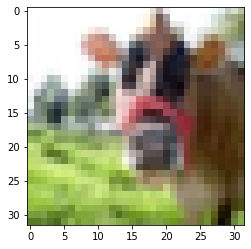

In [8]:

plt.imshow(x_train[0])

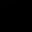

In [9]:
from google.colab.patches import cv2_imshow
x_train[0]
i= cv.cvtColor(x_train[0],cv.COLOR_BGR2RGB)
#print(i)
#plt.imshow(i,cmap ='gray')
cv2_imshow(i)

In [22]:
Y_train.shape

(100000, 100)

In [23]:
from keras.layers import Activation
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D,BatchNormalization
from keras import backend as K


In [24]:
model=Sequential()
model.add(Conv2D(32,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same',input_shape=(32,32,3)))
model.add(Conv2D(32,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
model.add(MaxPooling2D((2,2)))
model.add(BatchNormalization())
model.add(Conv2D(64,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
model.add(Conv2D(64,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
model.add(MaxPooling2D((2,2)))
model.add(BatchNormalization())
model.add(Conv2D(128,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
model.add(Conv2D(128,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
model.add(MaxPooling2D((2,2)))
model.add(BatchNormalization())
model.add(Flatten())
model.add(Dropout(0.2))
model.add(Dense(252,activation='relu'))
model.add(Dense(100,activation='softmax'))
model.compile(loss=keras.losses.categorical_crossentropy,optimizer=keras.optimizers.Adam(),metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 conv2d_7 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 batch_normalization_3 (Batc  (None, 16, 16, 32)       128       
 hNormalization)                                                 
                                                                 
 conv2d_8 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 conv2d_9 (Conv2D)           (None, 16, 16, 64)       

In [25]:
hist = model.fit(X_train, Y_train,batch_size=32,epochs=30,verbose=1,validation_data=(x_test, y_test))

Epoch 1/30
3125/3125 [==============================] - 19s 6ms/step - loss: 3.1142 - accuracy: 0.2452 - val_loss: 2.5171 - val_accuracy: 0.3548
Epoch 2/30
3125/3125 [==============================] - 19s 6ms/step - loss: 2.1558 - accuracy: 0.4283 - val_loss: 2.1849 - val_accuracy: 0.4290
Epoch 3/30
3125/3125 [==============================] - 18s 6ms/step - loss: 1.7730 - accuracy: 0.5130 - val_loss: 1.9849 - val_accuracy: 0.4760
Epoch 4/30
3125/3125 [==============================] - 18s 6ms/step - loss: 1.5159 - accuracy: 0.5735 - val_loss: 1.8515 - val_accuracy: 0.5039
Epoch 5/30
3125/3125 [==============================] - 19s 6ms/step - loss: 1.3223 - accuracy: 0.6226 - val_loss: 1.8156 - val_accuracy: 0.5246
Epoch 6/30
3125/3125 [==============================] - 18s 6ms/step - loss: 1.1539 - accuracy: 0.6621 - val_loss: 1.8150 - val_accuracy: 0.5332
Epoch 7/30
3125/3125 [==============================] - 18s 6ms/step - loss: 1.0143 - accuracy: 0.6986 - val_loss: 1.8043 - val_ac

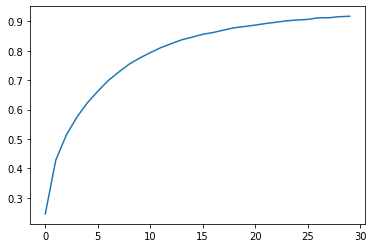

In [26]:
plt.plot(hist.history['accuracy'])

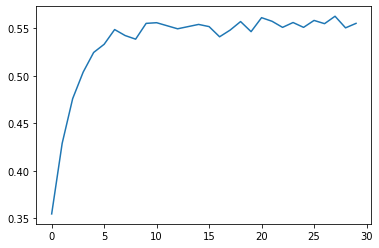

In [27]:
plt.plot(hist.history['val_accuracy'])

In [28]:
model.save('cifar100.h5')

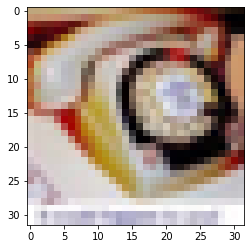

In [29]:
plt.imshow(x_train[5])

In [ ]:
np.argmax(y_train[5])


86

In [35]:
classes = [
    'apple', 'aquarium_fish', 'baby', 'bear', 'beaver', 'bed', 'bee', 'beetle',
    'bicycle', 'bottle', 'bowl', 'boy', 'bridge', 'bus', 'butterfly', 'camel',
    'can', 'castle', 'caterpillar', 'cattle', 'chair', 'chimpanzee', 'clock',
    'cloud', 'cockroach', 'couch', 'crab', 'crocodile', 'cup', 'dinosaur',
    'dolphin', 'elephant', 'flatfish', 'forest', 'fox', 'girl', 'hamster',
    'house', 'kangaroo', 'keyboard', 'lamp', 'lawn_mower', 'leopard', 'lion',
    'lizard', 'lobster', 'man', 'maple_tree', 'motorcycle', 'mountain', 'mouse',
    'mushroom', 'oak_tree', 'orange', 'orchid', 'otter', 'palm_tree', 'pear',
    'pickup_truck', 'pine_tree', 'plain', 'plate', 'poppy', 'porcupine',
    'possum', 'rabbit', 'raccoon', 'ray', 'road', 'rocket', 'rose',
    'sea', 'seal', 'shark', 'shrew', 'skunk', 'skyscraper', 'snail', 'snake',
    'spider', 'squirrel', 'streetcar', 'sunflower', 'sweet_pepper', 'table',
    'tank', 'telephone', 'television', 'tiger', 'tractor', 'train', 'trout',
    'tulip', 'turtle', 'wardrobe', 'whale', 'willow_tree', 'wolf', 'woman',
    'worm'
]

In [31]:
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array 
from keras.models import load_model
import numpy as np  
import matplotlib.pyplot as plt
import cv2 

# load and prepare the image
def load_image(filename):
	# load the image
	img = load_img(filename, target_size=(32, 32))	
	
	return img

expectation dinosaur


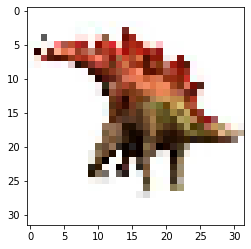

In [36]:
#test kết quả theo kiểu softmax
# nhớ mã hóa onehot y trước khi test

model = load_model('cifar100.h5')
	# load model
img = load_image('kl.png')
plt.imshow(img)
img = img_to_array(img)
img.shape
img = img.reshape(1,32,32,3)  
img.shape
result = model.predict(img)
#print(result)
np.argmax(result) 
print('expectation',classes[np.argmax(result)]) 

expectation telephone


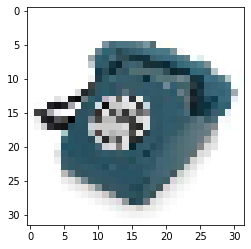

In [37]:
#test kết quả theo kiểu softmax
# nhớ mã hóa onehot y trước khi test

model = load_model('cifar100.h5')
	# load model
img = load_image('tablephone.png')
plt.imshow(img)
img = img_to_array(img)
img.shape
img = img.reshape(1,32,32,3)  
img.shape
result = model.predict(img)
#print(result)
np.argmax(result) 
print('expectation',classes[np.argmax(result)]) 

mountain
preict man


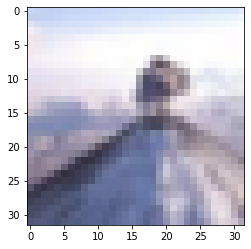

In [54]:
plt.imshow(x_test[0])
print(classes[np.argmax(y_test[0])])
print('preict',classes[np.argmax(model.predict(x_test[[0]]))])

forest
preict forest


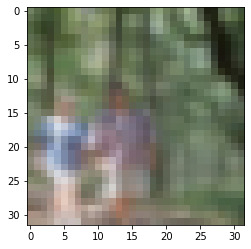

In [55]:
plt.imshow(x_test[1])
print(classes[np.argmax(y_test[1])])
print('preict',classes[np.argmax(model.predict(x_test[[1]]))])

seal
preict dolphin


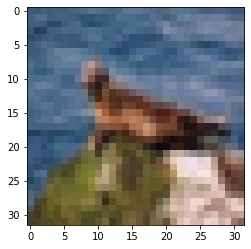

In [56]:
plt.imshow(x_test[2])
print(classes[np.argmax(y_test[2])])
print('preict',classes[np.argmax(model.predict(x_test[[2]]))])

sea
preict sea


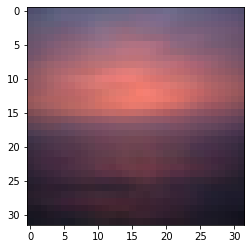

In [58]:
plt.imshow(x_test[4])
print(classes[np.argmax(y_test[4])])
print('preict',classes[np.argmax(model.predict(x_test[[4]]))])

tulip
preict beetle


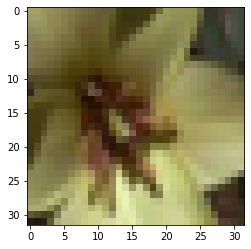

In [59]:
plt.imshow(x_test[5])
print(classes[np.argmax(y_test[5])])
print('preict',classes[np.argmax(model.predict(x_test[[5]]))])

lion
preict lion


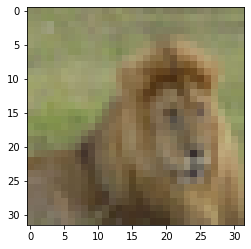

In [60]:
plt.imshow(x_test[15])
print(classes[np.argmax(y_test[15])])
print('preict',classes[np.argmax(model.predict(x_test[[15]]))])